# Task 1

数据集ex1data1.txt,有97个样本数据，每个样本有两列：人口和经济效益，通过实验，熟悉Python的一些基本函数和数据可视化方法。用最小二乘“参数估计”方法对模型进行求解。

### Import Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [2]:
data1 = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### preproces the data and visualize the data

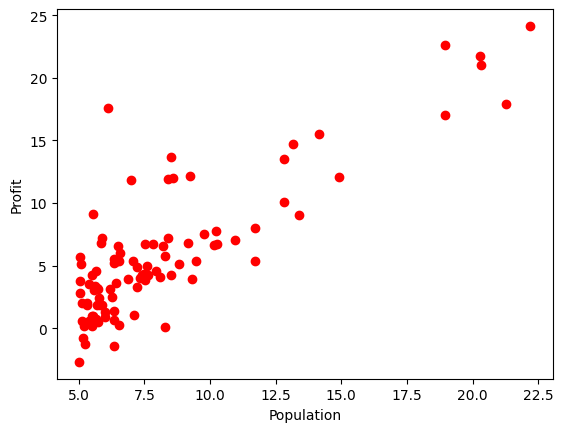

In [3]:
X = data1.iloc[:, 0]
y = data1.iloc[:, 1]
plt.plot(X, y, 'ro')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

### define the cost function

In [4]:
def Cost(X, y, omega):
    y_hat = np.dot(X, omega)
    res = np.sum(np.square(y_hat - y)) / (2 * len(y))
    return res

### define the gradient descent function

In [5]:
def GradientDescent(X, y, omega, lr, num_iters):
    cost_history = np.zeros(num_iters)
    for i in range(num_iters):
        y_hat = np.dot(X, omega)
        omega = omega - lr / len(y) * np.dot(X.T, y_hat - y)
        cost_history[i] = Cost(X, y, omega)
    return omega, cost_history

### The main function

In [6]:
X = np.c_[np.ones(len(y)), X]
omega = np.zeros(2)
lr = 0.01
num_iters = 1500
omega, cost_history = GradientDescent(X, y, omega, lr, num_iters)
print(omega)

[-3.63029144  1.16636235]


### plot the result

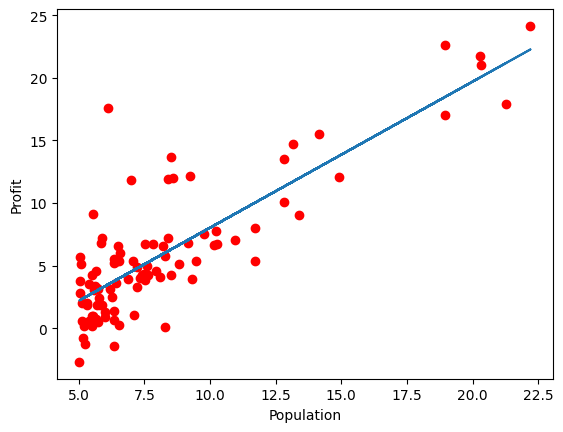

In [7]:
plt.plot(X[:, 1], np.dot(X, omega), '-')
plt.scatter(X[:, 1], y, c='r', marker='o')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()


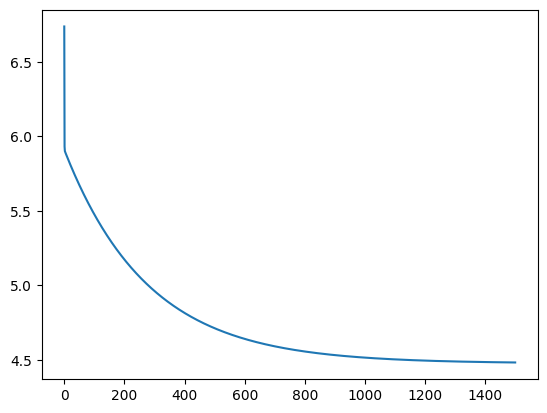

In [8]:
plt.plot(range(num_iters), cost_history, '-')

# Task 2

数据集ex1data2.txt中，有47个样本数据，每个数据有3列：房子大小，房间数目，房价。通过房子大小和房间数目作为样本特征，房价作为样本输出标签，通过线性回归模型来预测房价。请预测一个两间房，1300平方尺的房子的房价。

### read data

In [9]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### The cost function and gradient descent function uses the same as task 1

### Feature scaling

In [10]:
Mean2 = data2.mean()
Std2 = data2.std()

data2_norm = (data2 - Mean2) / Std2
data2_norm.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### The main function

In [11]:
X = data2_norm.iloc[:, 0:2]
y = data2_norm.iloc[:, 2]
X = np.c_[np.ones(len(y)), X]
omega = np.zeros(3)
lr = 0.01
num_iters = 1500

omega, cost_history = GradientDescent(X, y, omega, lr, num_iters)
print(omega)

[-9.41563612e-17  8.84042349e-01 -5.24551809e-02]


### transform the output

In [12]:
def reverse_norm(x, mean, std):
    return x * std + mean

### predict the price

In [13]:
inp = np.array([1300,2])
inp_norm = (inp - Mean2[0:2]) / Std2[0:2]
inp_norm = np.array([1, inp_norm[0], inp_norm[1]])
price = reverse_norm(np.dot(inp_norm, omega), Mean2[2], Std2[2])
print(price)

253036.3832379923


### The final cost after 1500 iterations

In [14]:
Cost(X, y, omega)

0.130686706060959

### plot the cost according to the iteration

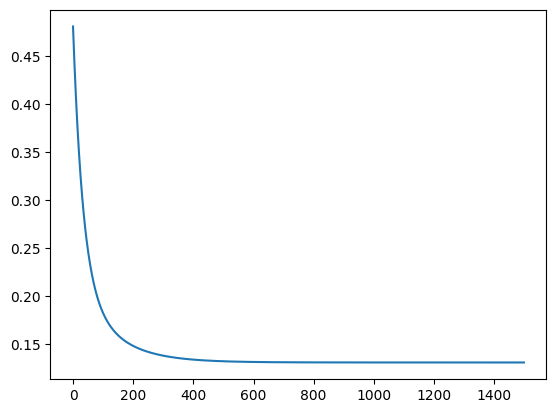

In [15]:
plt.plot(range(num_iters), cost_history, '-')

# Task 3

数据集BJ_AIR_data来自于机器学习数据集仓库UCI Machine Learning Repository（链接：http://archive.ics.uci.edu/ml/datasets.php）。

数据集中包含有2010-2014年北京美国大使馆收集的空气污染PM2.5数据及对应的气象数据。原始数据集中的缺失数据已经剔除。为了简化数据，部分属性值也已经省略。请根据给出的数据集简单分析这期间影响北京空气质量的主要因素。

### read data

In [16]:
data3 = pd.read_csv('BJ_AIR_data.csv',header=0)
data3.head()

,month,hour,DEWP,TEMP,Iws,Is,Ir,pm2.5
0,1,0,-16,-4,1.79,0,0,129
1,1,1,-15,-4,2.68,0,0,148
2,1,2,-11,-5,3.57,0,0,159
3,1,3,-7,-5,5.36,1,0,181
4,1,4,-7,-5,6.25,2,0,138


### Feature scaling and data preprocess

In [17]:
# 计算样本均值和标准差
Mean3 = data3.mean()
Std3 = data3.std()
# 标准化样本
data3_norm = (data3 - Mean3) / Std3
data3_norm.head()

,month,hour,DEWP,TEMP,Iws,Is,Ir,pm2.5
0,-1.596263,-1.661295,-1.229684,-1.347058,-0.444917,-0.071062,-0.137419,0.330207
1,-1.596263,-1.516877,-1.160403,-1.347058,-0.426981,-0.071062,-0.137419,0.536639
2,-1.596263,-1.372459,-0.883282,-1.429190,-0.409045,-0.071062,-0.137419,0.656152
3,-1.596263,-1.228042,-0.606160,-1.429190,-0.372971,1.212734,-0.137419,0.895179
4,-1.596263,-1.083624,-0.606160,-1.429190,-0.355035,2.496531,-0.137419,0.427991


In [18]:
# 选取特征和标签
X = data3_norm.iloc[:, 0:7]
y = data3_norm.iloc[:, 7]
# 添加偏置项
X = np.c_[np.ones(len(y)), X]
# 初始化参数
omega = np.zeros(8)
# 学习率
lr = 0.01
# 迭代
omega, cost_history = GradientDescent(X, y, omega, lr, num_iters)
# 输出参数，第一个参数为偏置项，后面的参数为特征权重
print(omega)

[ 7.67755653e-17 -6.59087784e-02  9.97098231e-02  7.05482329e-01
 -6.81910101e-01 -1.50656217e-01 -2.12150647e-02 -1.03030338e-01]
